In [24]:

import praw
import pandas as pd
import tweepy
import datetime as dt
import nltk
from textblob import TextBlob
from collections import Counter
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import twitter_samples, stopwords
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
from nltk import FreqDist, classify, NaiveBayesClassifier
import re, string, random


In [49]:
def scraper(username):
    begin_date = dt.date(2016,8,1)
    end_date = dt.date(2021,7,30)
    my_client_id = 'moLC0SeOcO9ESGvUGHz45Q'
    my_client_secret = 'inczNAi7j2a6zV_Yl9JWvDR3HpMsbQ'
    my_user_agent = 'Keyword_Searcher'
    username = 'Tough-Ad-7269'
    password = 'Shark123@'

    lst = []
    hot_posts = reddit.subreddit('stocks').hot(limit=10000)
    for post in hot_posts:
        if any([i in post.title for i in comp]):
            lst.append([post.title,post.score])
    
    return lst
        
    
        

In [50]:
df = pd.read_csv('Subreddits.csv')
company = pd.read_csv('Company.csv')
comp = [company.iloc[i][0].split('\t')[0] for i in range(company.shape[0])]

In [51]:
name = [df.iloc[i][0] for i in range(df.shape[0])]

In [52]:
lst = []
for i in name:
    lst.append(scraper(i))

In [54]:
all_p = [i for i in lst]

In [62]:
master = []
for i in range(len(all_p)):
    for j in range(len(all_p[i])):
        master.append(all_p[i][j])

In [70]:
comp

['Apple', 'Cisco', 'Amazon', 'Facebook', 'Sony', 'Google']

In [75]:
master

[['nVidia and Tesla combined are now worth more than Google', 182],
 ['Does Apple buy peloton?', 0],
 ['Meta (FB), Apple, and the metaverse', 0],
 ['Meta verse and why Facebook will be the most valuable company in the world.',
  0],
 ['Google VS Meta VS Microsoft VS Apple', 8],
 ['The "decline" of Facebook is a lie by the media. (And why the pivot into the Metaverse was smart)',
  15],
 ['Amazon plans to launch first internet satellites in late 2022', 26],
 ['Should Amazon Change Their Name?', 0],
 ['Amazon hired 628,000 people but is still short staffed', 332],
 ['Here’s the math for Tesla’s stock price if it becomes the Apple of car makers',
  0],
 ['nVidia and Tesla combined are now worth more than Google', 185],
 ['Does Apple buy peloton?', 0],
 ['Meta (FB), Apple, and the metaverse', 2],
 ['Meta verse and why Facebook will be the most valuable company in the world.',
  0],
 ['Google VS Meta VS Microsoft VS Apple', 5],
 ['The "decline" of Facebook is a lie by the media. (And why th

In [76]:
col = ['Post', 'Score']
master = pd.DataFrame(columns=col)

In [87]:
(lst[0][0][0])

str

In [91]:
post = []
score = []
for i in range(len(lst)):
    for j in range(len(lst[i])):
        print(lst[i][j])
        post.append(lst[i][j][0])
        score.append(lst[i][j][1])

['nVidia and Tesla combined are now worth more than Google', 182]
['Does Apple buy peloton?', 0]
['Meta (FB), Apple, and the metaverse', 0]
['Meta verse and why Facebook will be the most valuable company in the world.', 0]
['Google VS Meta VS Microsoft VS Apple', 8]
['The "decline" of Facebook is a lie by the media. (And why the pivot into the Metaverse was smart)', 15]
['Amazon plans to launch first internet satellites in late 2022', 26]
['Should Amazon Change Their Name?', 0]
['Amazon hired 628,000 people but is still short staffed', 332]
['Here’s the math for Tesla’s stock price if it becomes the Apple of car makers', 0]
['nVidia and Tesla combined are now worth more than Google', 185]
['Does Apple buy peloton?', 0]
['Meta (FB), Apple, and the metaverse', 2]
['Meta verse and why Facebook will be the most valuable company in the world.', 0]
['Google VS Meta VS Microsoft VS Apple', 5]
['The "decline" of Facebook is a lie by the media. (And why the pivot into the Metaverse was smart)',

In [97]:
masted = pd.DataFrame()
master['Post'] =post
master['Score'] = score

In [99]:
master.to_csv('Reddit.csv')

In [100]:
import pandas as pd
import tweepy
import datetime as dt
import nltk
import matplotlib as plt
from textblob import TextBlob
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tag import pos_tag
from nltk import FreqDist, classify, NaiveBayesClassifier
import re, string, random
import numpy as np
import nltk
import gensim
from collections import Counter
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.corpus import twitter_samples, stopwords
from nltk.tokenize import word_tokenize
from nltk import FreqDist, classify, NaiveBayesClassifier
import re, string, random
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from dateutil.parser import parser

In [103]:
def Vader(df):
    #updating
    nltk.download('vader_lexicon')
    
    #Initializing Sentiment Analysis of VADER
    sid = SentimentIntensityAnalyzer()
    
    #Filling Nulls
    df = df.fillna('')
    
    #Analysis
    df['Vader'] = df['Post'].apply(lambda cleaned: sid.polarity_scores(cleaned))
    df['compound']  = df['Vader'].apply(lambda score_dict: score_dict['compound'])
    df['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')
    
    #Overall Result
    
    #pos
    try:
        pos = df.get('comp_score').value_counts()[0]
    except IndexError as e:
        pos = 0
    
    #neg
    try:
        neg = df.get('comp_score').value_counts()[1]
    except IndexError as e:
        neg = 0

    #Printing
    print('Positive Percentage : ', pos/(pos+neg)*100)
    print('Negative Percentage : ', neg/(pos+neg)*100)
    
    print(df.get('comp_score').value_counts().plot(kind='bar'))
    
    return df

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/divyamrana/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Positive Percentage :  100.0
Negative Percentage :  0.0
AxesSubplot(0.125,0.125;0.775x0.755)


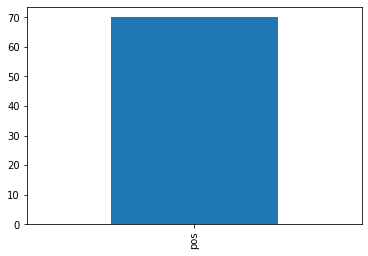

In [104]:
res = Vader(master)